## Agrégation de rangs avec la géométrie dans l'espace

L'objectif de cette méthode est de donner non seulement une visualisation, mais aussi une relation qui permet, à partir de 3 classements et de pondération respectives, d'obtenir un classement final.

### 1. Figure et notations

La figure utilisée est donc une pyramide de sommet $O(0;0;0)$, où chaque axe correspond à un classement. La base de la pyramide correspond aux "pires" éléments théoriques, et on introduit la distance $\beta$, qui définit la distance entre $O$ et le plan des meilleurs ; son utilité sera discutée plus tard.

On considère $n$ éléments. Les points $A(x_A;0;0)$, $B(0;y_B;0)$ et $C(0;0;z_C)$ représentent la position d'un élément unique sur les trois classements distincts.
Ces points forment un plan noté $T$ et de vecteur normal $\vec{n}\begin{pmatrix}a\\b\\c\end{pmatrix}$

On ajoute une droite $d$, passant par $O$ et dont le vecteur directeur $\vec{u}\begin{pmatrix}\lambda_A\\\lambda_B\\\lambda_C\end{pmatrix}$; $\lambda_A$, $\lambda_B$ et $\lambda_C$ étant les pondérations de chacun des classements.
Pour faciliter les calculs, on pose :
$$\lambda_A, \lambda_B, \lambda_C \in [0;1]\\\lambda_A+\lambda_B+\lambda_C=1$$

On note $I$ le point d'intersection de $d$ et $T$, et $f$ la distance $OI$.

In [6]:
# Traçage de la pyramide-support
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import math

# Sommets pyramide
MP = np.array([20, 0, 0])
PC = np.array([0, 20, 0])
PSI = np.array([0, 0, 20])
O = np.array([0, 0, 0])  # Point optimal

# Points de classement
A = np.array([8, 0, 0])
B = np.array([0, 12, 0])
C = np.array([0, 0, 15])

# Direction de la droite d
w = np.array([1, 2, 3])

# Droite d : O + t*w
t_vals = np.linspace(-1, 10, 100)
d_points = np.array([t_vals * w[0], t_vals * w[1], t_vals * w[2]])

# Plan T : formé par A, B, C
# On calcule un point I tel que I ∈ d ∩ plan(A, B, C)
AB = B - A
AC = C - A
n = np.cross(AB, AC)  # vecteur normal au plan T

# Produit scalaire entre n et vecteur (I - A) = 0
# Soit I = t*w, on veut : <n, t*w - A> = 0 → t = <n, A> / <n, w>
numerateur = np.dot(n, A)
denominateur = np.dot(n, w)
t_I = numerateur / denominateur
I = t_I * w

fig = go.Figure()

# Tracer arêtes pyramide
for edge in [[O, MP], [O, PC], [O, PSI], [MP, PC], [PC, PSI], [PSI, MP]]:
    fig.add_trace(go.Scatter3d(
        x=[edge[0][0], edge[1][0]],
        y=[edge[0][1], edge[1][1]],
        z=[edge[0][2], edge[1][2]],
        mode='lines',
        line=dict(color='lightblue', width=3),
        showlegend=False
    ))

# Plan de base (MP-PC-PSI)
triangle = np.array([MP, PC, PSI, MP])
fig.add_trace(go.Scatter3d(
    x=triangle[:, 0],
    y=triangle[:, 1],
    z=triangle[:, 2],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Plan base'
))

# Points A, B, C
for pt, name, color in zip([A, B, C], ["A", "B", "C"], ["red", "orange", "purple"]):
    fig.add_trace(go.Scatter3d(
        x=[pt[0]], y=[pt[1]], z=[pt[2]],
        mode='markers+text',
        marker=dict(size=5, color=color),
        text=[name],
        textposition="top center",
        name=f"Point {name}"
    ))

# Plan T (triangle ABC)
T_triangle = np.array([A, B, C, A])
fig.add_trace(go.Scatter3d(
    x=T_triangle[:, 0],
    y=T_triangle[:, 1],
    z=T_triangle[:, 2],
    mode='lines',
    line=dict(color='black', width=2),
    name='Plan T'
))

# Droite d
fig.add_trace(go.Scatter3d(
    x=d_points[0], y=d_points[1], z=d_points[2],
    mode='lines',
    line=dict(color='green', width=2, dash='dash'),
    name="Droite d"
))

# Point I (intersection)
fig.add_trace(go.Scatter3d(
    x=[I[0]], y=[I[1]], z=[I[2]],
    mode='markers+text',
    marker=dict(size=5, color='black'),
    text=["I"],
    textposition="top center",
    name="Intersection I"
))

# Point O
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers+text',
    marker=dict(size=6, color='green'),
    text=["O"],
    textposition="bottom right",
    name="Origine O"
))

fig.update_layout(
    scene=dict(
        xaxis_title='MP',
        yaxis_title='PC',
        zaxis_title='PSI',
        aspectmode='cube'
    ),
    title="Pyramide-support du raisonnement",
    width=900,
    height=800
)

fig.show()


### 2. Synthèse mathématique de la distance $f$

#### 2.1. Equation du plan $T$

On a $A(x_{A};0;0)$, $B(0;y_{B};0)$ et $C(0;0;z_{C})$

Donc : $\overrightarrow{AB}\begin{pmatrix}0-x_{A}\\y_{B}-0\\0-0\end{pmatrix}\overrightarrow{AB}\begin{pmatrix}-x_{A}\\y_{B}\\z_{C}\end{pmatrix}$ et $\overrightarrow{AC}\begin{pmatrix}0-x_{A}\\0-0\\z_{C}-0\end{pmatrix}\overrightarrow{AC}\begin{pmatrix}-x_{A}\\0\\z_{C}\end{pmatrix}$

On a posé que $\vec{n}\begin{pmatrix}a\\b\\c\end{pmatrix}\perp T$ et $\overrightarrow{AB}$ et $\overrightarrow{AC}$ ne sont pas colinéaires puisqu'une des coordonnées est nulle.
Donc :

$$
\begin{align}
\vec{n}\begin{pmatrix}a\\b\\c\end{pmatrix}\perp T &\implies 
\begin{cases}
\vec{n}\perp \overrightarrow{AB} \\ \\
\vec{n}\perp \overrightarrow{AC}
\end{cases}  \implies \begin{cases}
\vec{n}\cdot \overrightarrow{AB}=0 \\ \\
\vec{n}\cdot \overrightarrow{AC}=0
\end{cases} \\
 \\
&\implies \begin{cases}
-ax_{A}+by_{B}+0\times0=0 \\
-ax_{A}+0\times0+cz_{C}=0
\end{cases} \implies \begin{cases}
ax_{A}=by_{B} \\
ax_{A}=cz_{C}
\end{cases} \\
 \\
\vec{n}\begin{pmatrix}a\\b\\c\end{pmatrix}\perp T &\implies \begin{cases}
b=a\frac{x_{A}}{y_{B}} \\
c=a\frac{x_{A}}{z_{C}}
\end{cases}
\end{align}
$$

Donc en posant $a=1$ on obtient : $\vec{n}\begin{pmatrix}1\\ \frac{x_{A}}{y_{B}} \\ \frac{x_{A}}{z_{C}} \end{pmatrix}$

Ainsi, $T:x+ \frac{x_{A}}{y_{B}}y+\frac{x_{A}}{z_{C}}z+d=0$
Or $A(x_{A};0;0) \in T$ donc ses coordonnées vérifient $T$ :
$$x_{A}+\frac{x_{A}}{y_{B}}\times0+\frac{x_{A}}{z_{C}}\times0+d=0\implies d=-x_{A}$$

Donc finalement : $$T:x+\frac{x_{A}}{y_{B}}y+\frac{x_{A}}{z_{C}}z-x_{A}=0$$
#### 2.2. Equations paramétriques de la droite $d$

On a posé que la droite $d$ possède un vecteur directeur $\vec{u}\begin{pmatrix}\lambda_{A} \\\lambda_{B}\\\lambda_{C}\end{pmatrix}$
Donc ses équations paramétriques sont :

$$d:\begin{cases}
x=\lambda_{A}\cdot t \\
y=\lambda_{B}\cdot t \\
z=\lambda_{C}\cdot t
\end{cases}, \quad t\in \mathbb{R}$$
#### 2.3. Intersection de $T$ et $d$

Les coordonnées du point $I$ vérifient l'équation du plan $T$ *et* les équations paramétriques de $d$ :

$$\begin{cases}
x=\lambda_{A}\cdot t \\
y=\lambda_{B}\cdot t \\
z=\lambda_{C}\cdot t \\
x+\frac{x_{A}}{y_{B}}y+\frac{x_{A}}{z_{C}}z-x_{A}=0
\end{cases}$$
On remplace les équations paramétriques dans celle du plan, et on résout pour $t$ :

$$
\lambda_{A}t+\frac{x_{A}}{y_{B}}\lambda_{B}t+\frac{x_{A}}{z_{C}}\lambda_{C}t-x_{A}=0 \implies t\left( \lambda_{A}+\frac{x_{A}}{y_{B}}\lambda_{B}+\frac{x_{A}}{z_{C}}\lambda_{C} \right)=x_{A}
$$
Donc : $$t=\frac{x_{A}}{\lambda_{A}+\frac{x_{A}}{y_{B}}\lambda_{B}+\frac{x_{A}}{z_{C}}\lambda_{C}}$$
Il suffit ensuite de remplacer dans les les équations paramétriques, et on trouve :

$$x_{I}=\frac{x_{A}}{\lambda_{A}+\frac{x_{A}}{y_{B}}\lambda_{B}+\frac{x_{A}}{z_{C}}\lambda_{C}}\cdot\lambda_{A} \quad\text{et}\quad y_{I}=\frac{x_{A}}{\lambda_{A}+\frac{x_{A}}{y_{B}}\lambda_{B}+\frac{x_{A}}{z_{C}}\lambda_{C}}\cdot\lambda_{B} \quad\text{et}\quad z_{I}=\frac{x_{A}}{\lambda_{A}+\frac{x_{A}}{y_{B}}\lambda_{B}+\frac{x_{A}}{z_{C}}\lambda_{C}}\cdot\lambda_{C}$$

#### 2.4. Distance $f=OI$

On utilise une simple distance euclidienne :

$$\begin{align}
f&=\sqrt{ x_{I}^2+y_{I}^2+z_{I}^2 } \\
&=\sqrt{ (\lambda_{A}t)^2+(\lambda_{B}t)^2+(\lambda_{C}t)^2 } \\
&=\sqrt{ t^2(\lambda_{A}^2+\lambda_{B}^2+\lambda_{C}^2) } \\
f&=t\cdot \sqrt{ \lambda_{A}^2+\lambda_{B}^2+\lambda_{C}^2 }
\end{align}$$

Ainsi, finalement, à partir de 6 paramètres d'entrée ($x_{A}$, $y_{B}$, $z_{C}$, $\lambda_{A}$, $\lambda_{B}$ et $\lambda_{C}$), on obtient un score final, où tous les paramètres sont pris en compte :

$$f=\frac{x_{A}\cdot\sqrt{ \lambda_{A}^2+\lambda_{B}^2+\lambda_{C}^2}}{\lambda_{A}+\frac{x_{A}}{y_{B}}\lambda_{B}+\frac{x_{A}}{z_{C}}\lambda_{C}}$$


Commençons par définir un classement exemple :

### 3. Exemple : application avec des valeurs réels

On renseigne les pondérations et la liste des rangs (ici générérés programmatiquement), et on affiche le tableau créé

In [8]:
# Définition des pondérations de chaque classement
pond = {
    'A': 0.4,
    'B': 0.3,
    'C': 0.3
}

# Génération de 20 rangs
rangs = np.array([[i, (i + 1) % 20 + 1, (i + 2) % 20 + 1] for i in range(1, 21)])
rangs = [[1, 2, 1], [3, 1, 5], [2, 3, 3], [4, 4, 2], [5, 5, 4]]

# Conversion en tableau pandas
df = pd.DataFrame(rangs, columns=[['x','y','z'][list(dict.keys(pond)).index(label)] + label for label in list(dict.keys(pond))])
df

,xA,yB,zC
0,1,2,1
1,3,1,5
2,2,3,3
3,4,4,2
4,5,5,4


On réalise l'ensemble des calculs, c'est-à-dire :
* $t$ : le paramètre définissant l'intersection du plan $T$ et de la droite $d$
* $x_I$ $y_I$ et $z_I$ : les coordonnées du point d'intersection $I$
* $f$ : la distance qui nous intéresse

Notons que l'on aurait pu calculer directement $f$, car c'est la valeur qui nous intéresse ; mais pour faire une représentation géométrique comme précédemment, il nous faut les coordonnées exactes.

In [9]:
df['t'] = df['xA']/(pond['A']+(df['xA']/df['yB'])*pond['B']+(df['xA']/df['zC'])*pond['C'])
df['xI'] = df['t']*pond['A']
df['yI'] = df['t']*pond['B']
df['zI'] = df['t']*pond['C']
df['f'] = df['t'] * np.sqrt(pond['A']**2 + pond['B']**2 + pond['C']**2)
df

,xA,yB,zC,t,xI,yI,zI,f
0,1,2,1,1.176471,0.470588,0.352941,0.352941,0.685994
1,3,1,5,2.027027,0.810811,0.608108,0.608108,1.181950
2,2,3,3,2.500000,1.000000,0.750000,0.750000,1.457738
3,4,4,2,3.076923,1.230769,0.923077,0.923077,1.794139
4,5,5,4,4.651163,1.860465,1.395349,1.395349,2.712071


On réutilise la figure précédente, en affichant maintenant les points de notre cas exemple.

In [10]:
fig_I = go.Figure()

for edge in [[O, MP], [O, PC], [O, PSI]]:
    fig_I.add_trace(go.Scatter3d(
        x=[edge[0][0], edge[1][0]],
        y=[edge[0][1], edge[1][1]],
        z=[edge[0][2], edge[1][2]],
        mode='lines',
        line=dict(color='lightblue', width=3),
        showlegend=False
    ))

# Plan de base (MP-PC-PSI) - Added to second figure
triangle = np.array([MP, PC, PSI, MP]) # Ensure triangle is defined or accessible
fig_I.add_trace(go.Scatter3d(
    x=triangle[:, 0],
    y=triangle[:, 1],
    z=triangle[:, 2],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Plan base'
))

u = np.array([pond['A'], pond['B'], pond['C']])

min_t = df['t'].min()
max_t = df['t'].max()
t_vals_d = np.linspace(min_t * 0.8, max_t * 1.1, 100) 
d_points_correct = np.array([t_vals_d * u[0], t_vals_d * u[1], t_vals_d * u[2]])

fig_I.add_trace(go.Scatter3d(
    x=d_points_correct[0], y=d_points_correct[1], z=d_points_correct[2],
    mode='lines',
    line=dict(color='green', width=2, dash='dash'),
    name="Droite d"
))

fig_I.add_trace(go.Scatter3d(
    x=df['xI'], y=df['yI'], z=df['zI'],
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=[str(idx) for idx in df.index], 
    textposition="top center",
    name="Points I"
))

fig_I.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers+text',
    marker=dict(size=6, color='green'),
    text=["O"],
    textposition="bottom right",
    name="Origine O"
))

fig_I.update_layout(
    scene=dict(
        xaxis_title='MP',
        yaxis_title='PC',
        zaxis_title='PSI',
        aspectmode='cube',
    ),
    title="Visualisation des points d'intersection I sur la droite d",
    width=900,
    height=800,
    margin=dict(l=20, r=20, b=20, t=40) # Adjust margins to reduce whitespace
)

fig_I.show()

In [11]:
df_sorted = df.sort_values(by='f', ascending=True).reset_index()
df_sorted.drop(columns=['t', 'xI', 'yI', 'zI'], inplace=True)
df_sorted

,index,xA,yB,zC,f
0,0,1,2,1,0.685994
1,1,3,1,5,1.181950
2,2,2,3,3,1.457738
3,3,4,4,2,1.794139
4,4,5,5,4,2.712071


### 4. Etude statistique

$\lambda_A$, $\lambda_B$ et $\lambda_C$ deviennent des variables, donc la droite $d$ devient aussi variable : son intersection avec le plan des pires varie.

Pour chaque droite $d$ coupant le plan des pires, on calcule le classement agrégé ; selon le classement qu'on obtient, on colore le point d'intersection de $d$ et du plan des pires.

Se forment alors des zones colorées sur le plan des pires, que l'on peut alors étudier en 2D.
Le nombre de zones $N$ correspond au nombre de permutations des éléments :
$$N=P_n=n!$$

Ceci est issu d'une [publication de maths](https://arxiv.org/pdf/2206.00001) : 

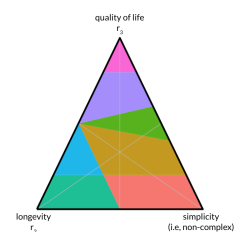

In [ ]:
# A coder